
**What is facial recognition?**



Facial recognition is a technology that is capable of recognizing a person based on their face. It depends on one-shot learning technique (one-shot learning aims to learn information about object categories from one, or only a few, training images.)

**How does facial recognition work?**



Facial technology systems can vary, but in general, they tend to operate as follows:

1.   Step 1: Face detection

Face detection is AI-based computer technology that is used to extract and identify human faces from digital images.

2.   Step 2: Face analysis

The software reads the geometry of your face. Key factors include the distance between your eyes, the depth of your eye sockets, the distance from forehead to chin, the shape of your cheekbones, and the contour of the lips, ears, and chin. The aim is to identify the facial landmarks that are key to distinguishing your face.

3.   Step 3: Converting the image to ecoding

we can create the ecoding for the face by feeding into the model. In order to compare two images,we can create the ecoding for both images by feeding through the model separately. First model output the encoding of the first input image and second model output the encoding of its input image.

Then we calculate the distance between two encodings : 

if distance(encoding 1 , encoding 2) < tolerance  --> similar faces

if distance(encoding 1 , encoding 2) > tolerance  --> different face



In [ ]:
# install face_recognition lib
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=63341dd995e1202de917cbccdabc10f95e7d56b2eee09d242041cc44d67e30a4
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
# import the necessary packages
import face_recognition
import glob as gb
import os
import matplotlib.pyplot as plt

In [ ]:
#images path
known_images_path = "/content/pic"
unknown_images_path = "/content/ukn"

In [ ]:
# grab all images in known directory
# the list of data (i.e., known images) and name images

known_images = []
known_names = []

extension = "jpg"

In [ ]:
#Open known Folder
#now let's check the known folder to have a look to its content

for folder in  os.listdir(known_images_path) :
    print(folder)
    file_list = []
    file_list.extend(gb.glob(pathname= str( known_images_path +'//' + folder + '/*.' + extension)))
    
    # loop over the image paths
    for imagePath in file_list:
      #load image
      image = face_recognition.load_image_file(imagePath)
      #encoding contains a universal 'encoding' of the facial features that can be compared to any other picture of a face!
      encoding = face_recognition.face_encodings(image)[0] # we use [0] if we have just have one person in the image
      known_images.append(encoding)
      known_names.append(folder)




musk
.ipynb_checkpoints
bean


ukn2.jpg
ukn4.jpg
ukn5.jpg
ukn.jpg
ukn6.jpg
ukn3.jpg


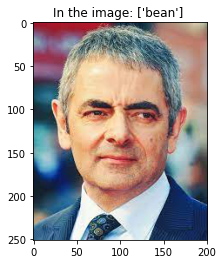

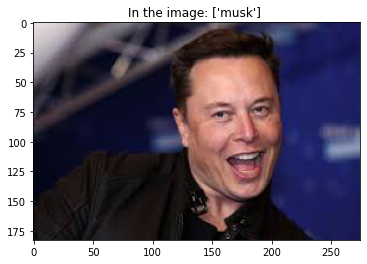

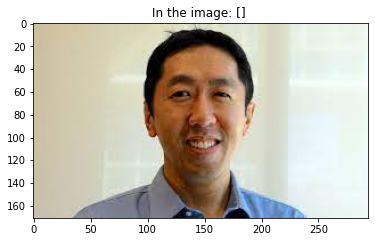

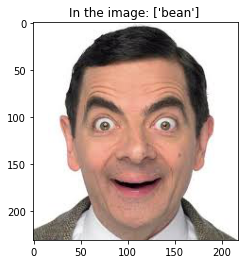

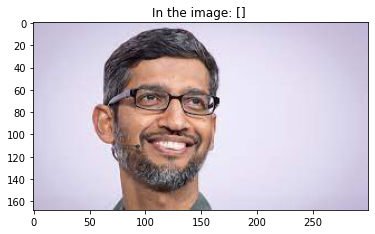

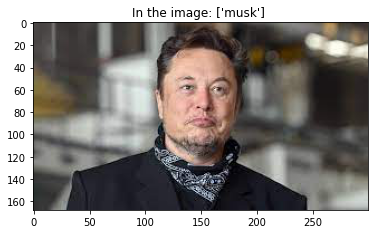

In [ ]:
#Open unknown Folder
#now let's check the unknown folder to have a look to its content

for folder in  os.listdir(unknown_images_path) :
    print(folder)
    file_list = []
    file_list.extend(gb.glob(pathname= str( unknown_images_path +'/*.' + extension)))

for imagePath in file_list:

  #plot image
  img = plt.imread(imagePath)
  plt.figure()
  plt.imshow(img)
  #load image
  image = face_recognition.load_image_file(imagePath)
  encodings = face_recognition.face_encodings(image)
  #list if we have many face in an image
  faces = []
  for encoding in encodings:
    #Now we can see the two face encodings are of the same person with "compare_faces"
    results = face_recognition.compare_faces(known_images, encoding, tolerance=0.6)
    if any(results):
      faces.append(known_names[results.index(True)])
  plt.title('In the image: %s ' % str(faces))





